In [66]:
import pandas as pd 
import numpy as np


In [67]:
df = pd.read_csv("/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
df

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000


In [69]:
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [70]:
df.tail()

,Date,Open,High,Low,Close,Volume,Stock Trading
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


In [71]:
df = df['High']

In [72]:
import matplotlib.pyplot as plt

def plot_series(data):
  for df in data :
    plt.plot(df)
  plt.show()



In [73]:
train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)) :]

In [74]:
def arrange(data,window=10):
  x = []
  y = []

  for i,val in enumerate(data):
    if i<window:
      continue
    x.append(data[i-window :i-1].values.reshape(-1,1))
    y.append(data[i:i+1].values.reshape(-1,1))

  x = np.asarray(x)
  y = np.asarray(y)

  return x,y

In [75]:
X_train, y_train = arrange(train,15)
print("x_shape is: {} and y-shape is: {}".format(X_train.shape , y_train.shape))

x_shape is: (965, 14, 1) and y-shape is: (965, 1, 1)


In [76]:
print(X_train[0])
print(y_train[0])

[[42330]
 [43220]
 [43970]
 [43700]
 [43660]
 [43840]
 [44370]
 [43630]
 [43150]
 [43550]
 [43880]
 [43440]
 [43300]
 [44000]]
[[41560]]


In [77]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Input

In [78]:
Net = Sequential()
Net.add(SimpleRNN(3,activation='relu',input_shape=X_train.shape[1:]))
Net.add(Dense(1,activation='relu'))

Net.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [79]:
Net.compile(loss = 'mean_squared_error',optimizer='adam',metrics=['mse'])

In [80]:
Net.fit(X_train,y_train,epochs=10)

Epoch 1/10
31/31 [==============================] - 1s 4ms/step - loss: 391278080.0000 - mse: 391278080.0000
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 266696400.0000 - mse: 266696400.0000
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 162904048.0000 - mse: 162904048.0000
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 85507928.0000 - mse: 85507928.0000
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 36429668.0000 - mse: 36429668.0000
Epoch 6/10
31/31 [==============================] - 0s 4ms/step - loss: 12492422.0000 - mse: 12492422.0000
Epoch 7/10
31/31 [==============================] - 0s 4ms/step - loss: 4029810.7500 - mse: 4029810.7500
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: 1994767.0000 - mse: 1994767.0000
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 1670327.1250 - mse: 1670327.1250
Epoch 10/10
31/31 [==================

In [81]:
X_test,y_test = arrange(test,15)
pred = Net.predict(X_test)
pred

array([[19373.098],
       [19307.36 ],
       [18941.742],
       [18972.842],
       [18908.756],
       [18395.438],
       [18560.453],
       [18574.354],
       [18145.473],
       [17846.775],
       [17595.104],
       [17538.012],
       [17452.658],
       [17302.807],
       [16912.49 ],
       [16794.088],
       [17167.754],
       [17017.324],
       [16974.055],
       [17423.076],
       [17452.43 ],
       [17469.3  ],
       [17321.627],
       [17595.164],
       [17748.547],
       [17903.95 ],
       [18160.643],
       [17933.781],
       [17968.45 ],
       [17894.074],
       [17545.744],
       [17296.15 ],
       [17091.941],
       [16956.064],
       [17022.053],
       [16709.57 ],
       [16115.204],
       [16250.199],
       [16664.707],
       [17730.186],
       [18629.213],
       [18508.395],
       [18561.746],
       [18246.05 ],
       [18243.398],
       [17928.691],
       [17977.686],
       [18585.943],
       [18092.652],
       [18044.387],


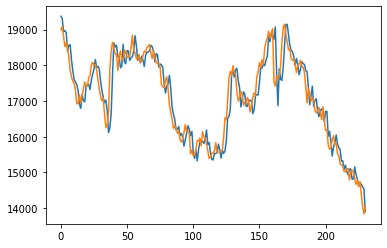

In [82]:
plot_series([pred[: ,0],y_test[:,:,0]])